In [1]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../../Real Data/Healthy_Control_Data/Four_dots_static_ug.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(18)]

for i in range(18):

    x[i] = data[1,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/18

# Extracting y data and averaging
y = [ [] for i in range(18)]

for i in range(18):

    y[i] = data[1,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/18

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [2]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [3]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [4]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(avlogdiv, n, m2, m1, c1, c2):

    func_to_min = m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

    return func_to_min

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

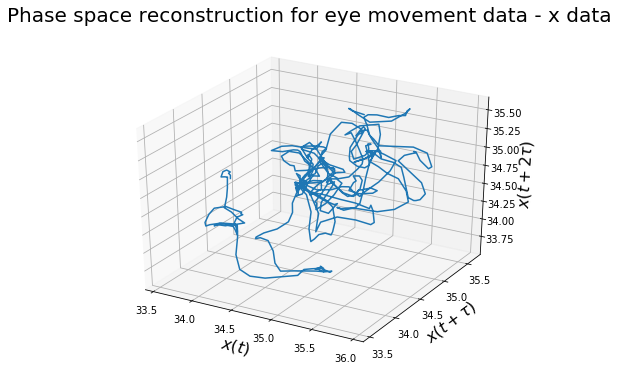

In [5]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 26, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - y data')

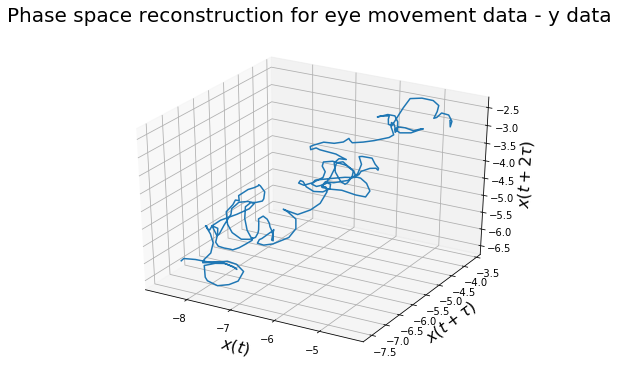

In [6]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 86, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - y data', fontsize=20, pad=40)

Text(0.5, 0, '$r(t+2τ)$')

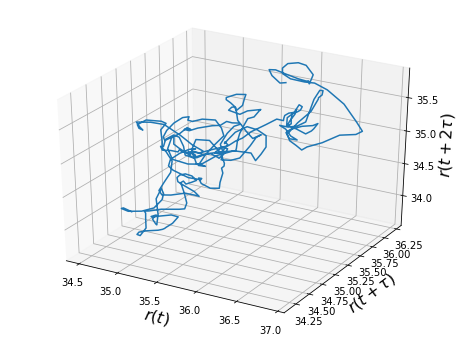

In [7]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 59, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

250.0
The period of x data is 0.004 seconds


Text(0, 0.5, 'Power')

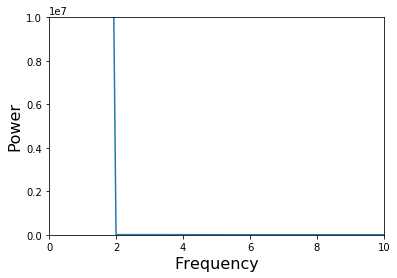

In [8]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x_data,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of y data is 0.004 seconds


Text(0, 0.5, 'Power')

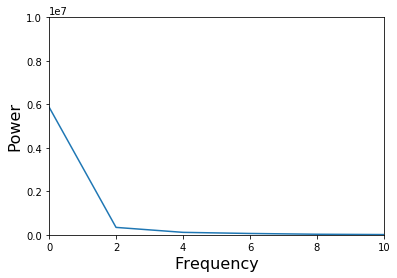

In [9]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y_data,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of y data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of r data is 0.004 seconds


Text(0, 0.5, 'Power')

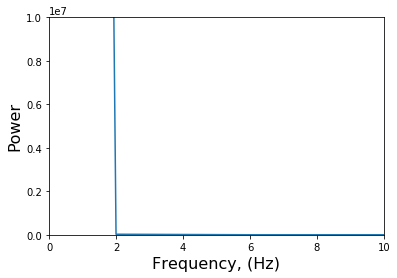

In [10]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r_data,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of r data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [11]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[0])

[  0   1   3   2  84  85   4  15  14   5  83  13  16  86  12   6 104 105
  82 103  11  17  87 102 106   7 127  99 100  10  98 128   9 222   8  45
  44  46 126 101  80  79 223  97  81 129  78 221  47  48 107  96  88  49
 214  95  18 224 218 220 219  43  50  51 213  90 215  89 125 217  77  91
 108  52  71 130 216  42  30  76  72 225  31  94  19  53  70  92  73 271
  54  69 211 212  75  41 270  93  74 272 254  29 210 226 306 191 131  55
 124 264 290 109 273  27  56  20 305 253  57  28 192 269  68 342 255  40
 291 209 263  32 247 248 265 304 227 307 343  26 266 289 252 274 249 190
 262 246 267 268 341 132 256 228 203 204 303 250 205 166  58 251 165 206
 110  21  67 292 208 315 193 196  39 344 197 164 207 302 136 308 340 261
 202 338 123 314 316 229 260 336 337 259 258 257 245 335 195 135 301  33
 133 167]


In [12]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])

[  0   1   2  11   3  10   4  12   5  13   9  21  42  52  22  53  51  14
   6  41  43  20  23  50   8  54   7  24  15  44  28  29  19  49  25  40
  55  45  27  16  78  18  26  79  77  59  30  17  48  58  46 100  56  47
  57  80  99  60  39  98 101  81  31  76  82  83  38  84  61  85 102  37
  75  97  73  93  36  74  32  62  94  86  96  72  92  89  87  88  90  91
  63  95  35  33  64  34  65  71 103  70  66  69  67  68 107 104 108 106
 105 109 110 139 140 111 138 136 137 128 135 129 141 127 115 114 134 112
 130 165 113 116 131 164 133 166 142 132 126 163 117 143 144 167 145 186
 176 118 177 125 175 162 187 146 168 185 178 174 188 184 124 119 169 173
 147 123 179 149 171 170 148 122 172 161 120 189 150 183 121 180 182 151
 190 181 160 159 191 152 158 192 195 194 153 154 193 156 155 157 196 197
 198 199]


In [13]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   5   4   6  15   2  16   3  17   7   8  14   9  18  13  71  10
  11  72  12  73  19  70  75  79  69  76  74  78  77  51  64  50  63  52
  62  53  57  49  65  80  98  58 121  45  66  54 180 179  68  67 120  55
  97  20  56  44 178  99 122 181  46  40 123 177 130  61 133 119  59  43
  48 131  39  41 129 132 124  47  42 125 134  60  38  81 118 128  96 176
 182  37 126 135 100  36 127  35 117  21  82 175  95 136 101  83 158  93
  34 103 183 189 102  84  92 188 137 159 138 116 190  94 174 104 184 157
  33 139 187 171 185  32  85 170  22 173 186 192 191 160 193  91 115 105
 172  31 162  25 217 163 140 240 241  26 114 161 216 110 111 112 156 222
 218  30 194  86 169 106 221 239 215 113 108 109 238  24  27  23 107 164
 219 220  87 223  29 237 141  88 205  90 142 236 195 242  28 214 198 197
 206 143]


Text(0.5, 1.0, 'Divergence of x data trajectories')

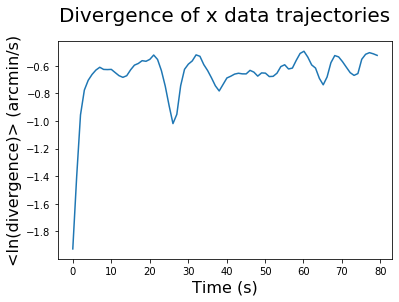

In [21]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 80
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
#t_regx = t[0:75].reshape(-1,1)
#divx_reg = av_log_div_x[0:75].reshape(-1,1)

#reg_x = LinearRegression().fit(t_regx, divx_reg)
#grad_x = reg_x.coef_.item()
#intercept_x = reg_x.intercept_.item()

#resx = av_log_div_x[0:75] - (t[0:75]*grad_x + intercept_x)
#resx_sq = np.sum(resx**2)
#tmean = np.mean(t[0:75])
#ttx = np.sum((t[0:75]-tmean)**2)

#error_x = np.sqrt((1/73)*(resx_sq/ttx))

plt.plot(t[0:80], av_log_div_x)
#plt.plot(t[0:75], t[0:75]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


#print(grad_x)
#print(error_x)


0.005738650600000971
0.0009065214240251755


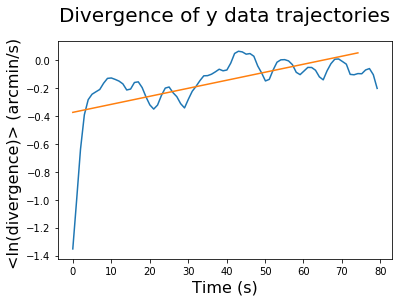

In [23]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 80
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
t_regy = t[0:75].reshape(-1,1)
divy_reg = av_log_div_y[0:75].reshape(-1,1)

reg_y = LinearRegression().fit(t_regy, divy_reg)
grad_y = reg_y.coef_.item()
intercept_y = reg_y.intercept_.item()

resy = av_log_div_y[0:75] - (t[0:75]*grad_y + intercept_y)
resy_sq = np.sum(resy**2)
tmean_y = np.mean(t[0:75])
tty = np.sum((t[0:75]-tmean_y)**2)

error_y = np.sqrt((1/73)*(resy_sq/tty))

plt.plot(t[0:80], av_log_div_y)
plt.plot(t[0:75], t[0:75]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

print(grad_y)
print(error_y)


0.0010445360234866928
0.0012928262214147266


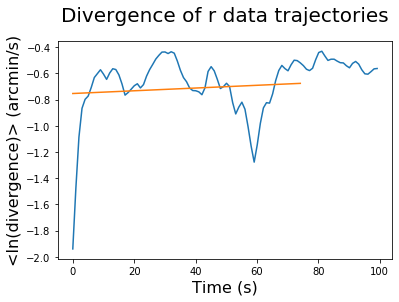

In [26]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 100
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
t_regr = t[0:75].reshape(-1,1)
divr_reg = av_log_div_r[0:75].reshape(-1,1)

reg_r = LinearRegression().fit(t_regr, divr_reg)
grad_r = reg_r.coef_.item()
intercept_r = reg_r.intercept_.item()

resr = av_log_div_r[0:75] - (t[0:75]*grad_r + intercept_r)
resr_sq = np.sum(resr**2)
tmean_r = np.mean(t[0:75])
ttr = np.sum((t[0:75]-tmean_r)**2)

error_r = np.sqrt((1/73)*(resr_sq/ttr))

plt.plot(t[0:100], av_log_div_r)
plt.plot(t[0:75], t[0:75]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

print(grad_r)
print(error_r)